This is a practice for myself, based of Coursera ML course by Andrew Ng.
This first file will have linear regression from the basics with cost function and gradient descent.
We will be working on the Linear Regression labs

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 
*** Copied from Andrew Ng Lab


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.
*** Copied from Andrew Ng Lab

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.
*** Copied from Andrew Ng Lab

## Problem Statement

In [24]:
import math, copy
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
# Cost function
# since this is the y=mx+b model, cost is sum[(model - y_training)**2] 
def compute_cost(x, y, w, b):
    
    m = x.shape[0] #length of x training data
    cost = 0.0 
    
    for i in range (m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * cost 
    
    return total_cost

In [26]:
# Gradient Descent partial derivative computation
"""
Computes gradient for linear regression model 
Args:
    x array of training data with m examples
    y array of target values
    w,b model features
Returns:
    partial derivative of cost function
    dj_dw
    dj_wb
"""
def compute_gradient (x, y, w, b):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range (m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [27]:
# Gradient Descent Algoirithm
"""
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
"""
def gradient_descent (x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    # Arrays to store cost function J and w at interations 
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range (num_iters):
        # calculates gradient for w,b and updates using gradient_function
        dj_dw, dj_db = gradient_function (x, y, w, b)

        # updates w, b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # save cost J at each iteration
        if i < 100000: 
            J_history.append(cost_function (x,y,w,b))
            p_history.append([w,b])

        if i%math.ceil(num_iters/10) == 0:
            print (f"Iterations {i:4}: Cost {J_history[-1]:0.2e}",
                   f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                   f"w: {w: 0.3e}, b: {b: 0.5e}")

    return w, b, J_history, p_history


In [28]:
# Time to run code
x_train = np.array([1.0, 2.0]) 
y_train = np.array([300.0,500.0])

# intialize parameters
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

#run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iterations    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w:  6.500e+00, b:  4.00000e+00
Iterations 1000: Cost 3.41e+00 dj_dw: -3.712e-01, dj_db:  6.007e-01 w:  1.949e+02, b:  1.08228e+02
Iterations 2000: Cost 7.93e-01 dj_dw: -1.789e-01, dj_db:  2.895e-01 w:  1.975e+02, b:  1.03966e+02
Iterations 3000: Cost 1.84e-01 dj_dw: -8.625e-02, dj_db:  1.396e-01 w:  1.988e+02, b:  1.01912e+02
Iterations 4000: Cost 4.28e-02 dj_dw: -4.158e-02, dj_db:  6.727e-02 w:  1.994e+02, b:  1.00922e+02
Iterations 5000: Cost 9.95e-03 dj_dw: -2.004e-02, dj_db:  3.243e-02 w:  1.997e+02, b:  1.00444e+02
Iterations 6000: Cost 2.31e-03 dj_dw: -9.660e-03, dj_db:  1.563e-02 w:  1.999e+02, b:  1.00214e+02
Iterations 7000: Cost 5.37e-04 dj_dw: -4.657e-03, dj_db:  7.535e-03 w:  1.999e+02, b:  1.00103e+02
Iterations 8000: Cost 1.25e-04 dj_dw: -2.245e-03, dj_db:  3.632e-03 w:  2.000e+02, b:  1.00050e+02
Iterations 9000: Cost 2.90e-05 dj_dw: -1.082e-03, dj_db:  1.751e-03 w:  2.000e+02, b:  1.00024e+02
(w,b) foun

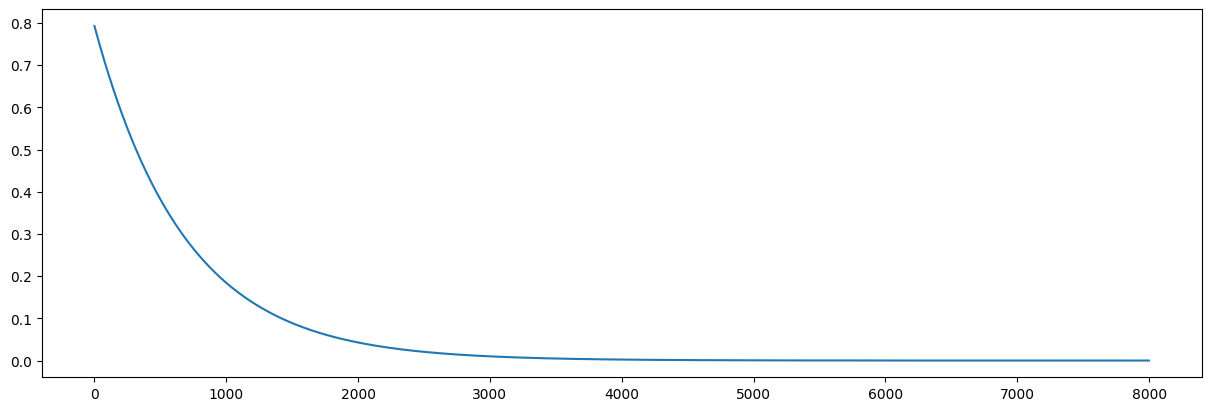

In [37]:
fig, ax = plt.subplots(figsize = (12, 4), layout = 'constrained')
ax.plot(J_hist[2000:iterations])
